In [7]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

In [8]:
path="C:/Users/busra/veri_manipulasyonu1/TRAIN_IMAGE"

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='rgb',
    image_size=(224, 224),
    batch_size=64, 
    shuffle=True)

Found 32249 files belonging to 5 classes.


In [26]:
train_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [27]:
for image, label in train_ds.take(1):
    print(label)


tf.Tensor(
[0 0 0 0 2 0 0 0 2 1 0 2 2 1 0 0 0 0 1 0 4 2 2 0 2 0 0 0 0 2 2 0 0 0 2 0 0
 4 3 0 1 0 0 2 0 0 4 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0], shape=(64,), dtype=int32)


In [28]:
train_ds.class_names

['0', '1', '2', '3', '4']

In [29]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='rgb',
    validation_split=0.2,
    subset="training",
    image_size=(224, 224),
    batch_size=64)

Found 32249 files belonging to 5 classes.
Using 25800 files for training.


In [30]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='rgb',
    validation_split=0.2,
    subset="validation",
    image_size=(224, 224),
    batch_size=64)

Found 32249 files belonging to 5 classes.
Using 6449 files for validation.


In [31]:
train_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [32]:
val_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

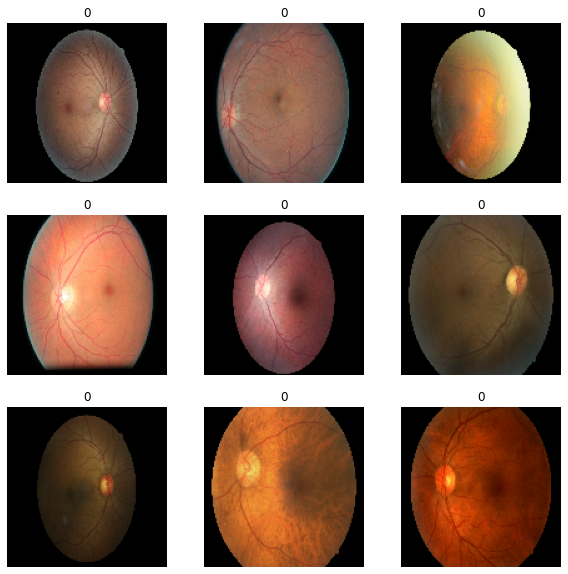

In [17]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")

In [33]:
from tensorflow.python.keras.models import Sequential
from keras.engine import InputLayer

In [34]:
model = Sequential()
model.add(ResNet101(include_top=True,input_tensor=None,pooling='avg',classes=1000,weights="imagenet"))
model.add(Flatten())
model.add(Dense(512, activation='softmax'))
model.add(Dense(5, activation = 'softmax'))

model.layers[0].trainable = False
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 1000)              44707176  
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2565      
Total params: 45,222,253
Trainable params: 515,077
Non-trainable params: 44,707,176
_________________________________________________________________


In [35]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01, decay=1e-06),
            loss='sparse_categorical_crossentropy', metrics=['acc'])

In [36]:
history = model.fit( train_ds, epochs=1, batch_size=128,validation_data=val_ds)

404/404 [==============================] - 6865s 17s/step - loss: 1.0135 - acc: 0.7161 - val_loss: 0.8647 - val_acc: 0.7302


In [1]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(train_ds,val_ds, verbose=2)

NameError: name 'plt' is not defined